<a href="https://colab.research.google.com/github/canoztas/CMP682-AI-Final-Project/blob/main/drebin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import time
import pickle
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score, precision_recall_curve, recall_score, roc_curve, precision_score
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D, Dense, Dropout, LeakyReLU
from mlxtend.plotting import plot_confusion_matrix
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from tqdm import tqdm, tqdm_notebook
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from keras.models import Model
from keras.applications import VGG16
from keras.optimizers import Adam
import keras

In [15]:
drebin_data = pd.read_csv("/content/drebin215dataset5560malware9476benign.csv", encoding="utf-8", low_memory=False, na_values="?")

In [16]:
drebin_data["class"] = drebin_data["class"].map({"B": 0, "S": 1})
drebin_data = drebin_data.dropna()

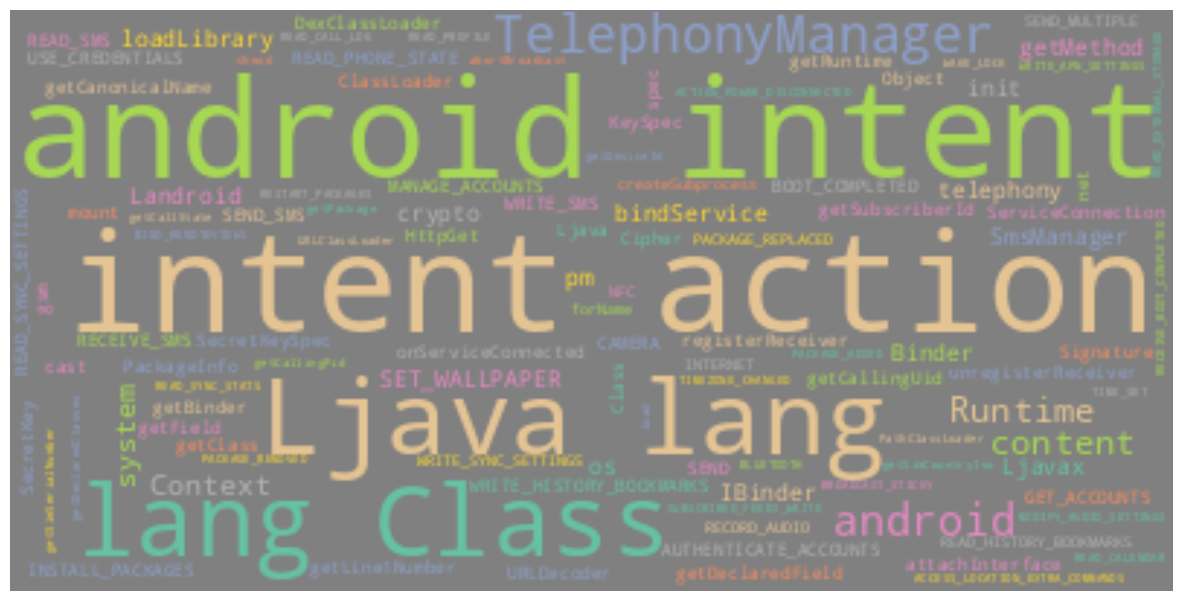

<Figure size 1000x600 with 0 Axes>

In [ ]:
features=pd.read_csv('/content/dataset-features-categories.csv', encoding='utf8')
#word cloud
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in features.transact)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200,colormap='Set2', background_color="grey").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

In [17]:
X = drebin_data.drop("class", axis=1)
y = drebin_data["class"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred_train = logreg.predict(X_train)
logreg_pred_test = logreg.predict(X_test)

logreg_train_score = accuracy_score(logreg_pred_train, y_train)
logreg_test_score = accuracy_score(logreg_pred_test, y_test)
print("Logistic Regression Train Score:", logreg_train_score)
print("Logistic Regression Test Score:", logreg_test_score)

Logistic Regression Train Score: 0.9814888010540185
Logistic Regression Test Score: 0.9767209843698038


In [ ]:
logreg_precision_score = precision_score(y_test, logreg_pred_test)
logreg_f1_score = f1_score(y_test, logreg_pred_test)
logreg_recall_score = recall_score(y_test, logreg_pred_test)
logreg_accuracy_score = accuracy_score(y_test, logreg_pred_test)

print("Logistic Regression Precision Score:", logreg_precision_score)
print("Logistic Regression F1 Score:", logreg_f1_score)
print("Logistic Regression Recall Score:", logreg_recall_score)
print("Logistic Regression Accuracy Score:", logreg_accuracy_score)

Logistic Regression Precision Score: 0.961369622475856
Logistic Regression F1 Score: 0.9690265486725664
Logistic Regression Recall Score: 0.9768064228367529
Logistic Regression Accuracy Score: 0.9767209843698038


In [ ]:
print(classification_report(y_test, logreg_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1886
           1       0.96      0.98      0.97      1121

    accuracy                           0.98      3007
   macro avg       0.97      0.98      0.98      3007
weighted avg       0.98      0.98      0.98      3007



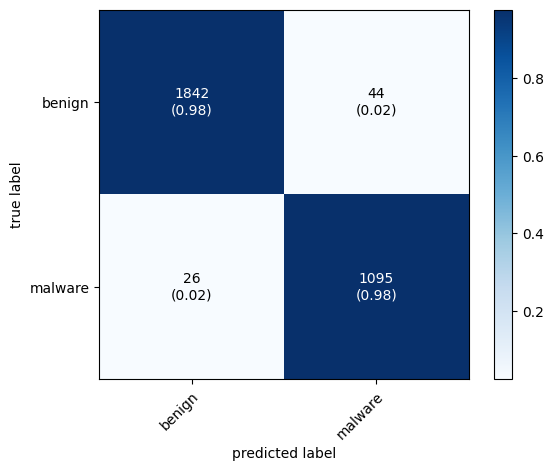

In [ ]:
logreg_cm = confusion_matrix(y_test, logreg_pred_test)
fig, ax = plot_confusion_matrix(conf_mat=logreg_cm, show_absolute=True, show_normed=True, colorbar=True, class_names=["benign", "malware"])
plt.show()

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred_train = rf.predict(X_train)
rf_pred_test = rf.predict(X_test)

rf_train_score = accuracy_score(rf_pred_train, y_train)
rf_test_score = accuracy_score(rf_pred_test, y_test)
print("Random Forest Train Score:", rf_train_score)
print("Random Forest Test Score:", rf_test_score)

Random Forest Train Score: 0.9994071146245059
Random Forest Test Score: 0.9870302627203192


In [ ]:
rf_precision_score = precision_score(y_test, rf_pred_test)
rf_f1_score = f1_score(y_test, rf_pred_test)
rf_recall_score = recall_score(y_test, rf_pred_test)
rf_accuracy_score = accuracy_score(y_test, rf_pred_test)

print("Random Forest Precision Score:", rf_precision_score)
print("Random Forest F1 Score:", rf_f1_score)
print("Random Forest Recall Score:", rf_recall_score)
print("Random Forest Accuracy Score:", rf_accuracy_score)

Random Forest Precision Score: 0.9936131386861314
Random Forest F1 Score: 0.9824086603518268
Random Forest Recall Score: 0.9714540588760036
Random Forest Accuracy Score: 0.9870302627203192


In [ ]:
print(classification_report(y_test, rf_pred_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1886
           1       0.99      0.97      0.98      1121

    accuracy                           0.99      3007
   macro avg       0.99      0.98      0.99      3007
weighted avg       0.99      0.99      0.99      3007



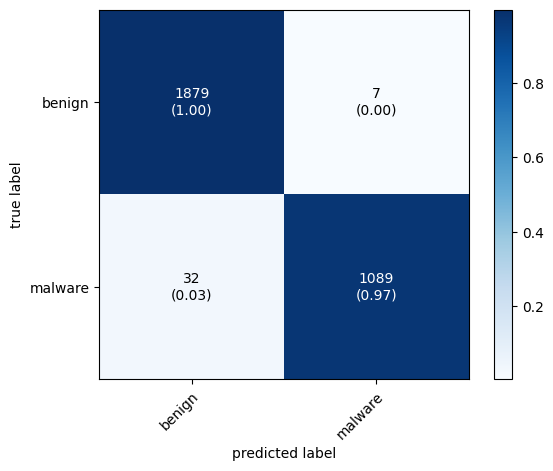

In [ ]:
rf_cm = confusion_matrix(y_test, rf_pred_test)
fig, ax = plot_confusion_matrix(conf_mat=rf_cm, show_absolute=True, show_normed=True, colorbar=True, class_names=["benign", "malware"])
plt.show()

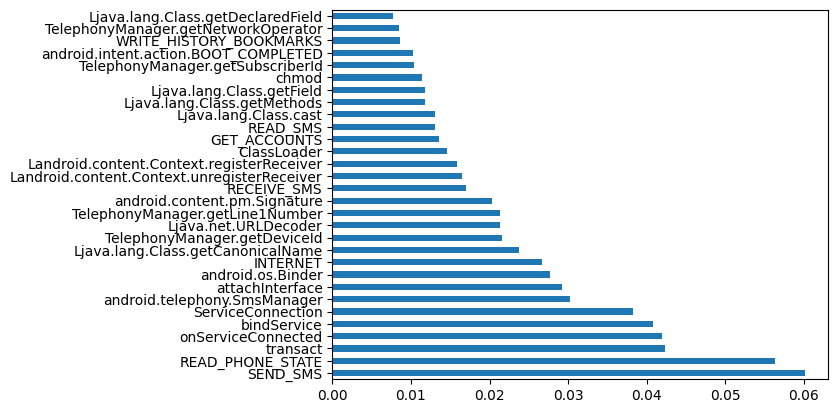

In [ ]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb_pred_train = xgb.predict(X_train)
xgb_pred_test = xgb.predict(X_test)

xgb_train_score = accuracy_score(xgb_pred_train, y_train)
xgb_test_score = accuracy_score(xgb_pred_test, y_test)
print("XGBClassifier Train Score:", xgb_train_score)
print("XGBClassifier Test Score:", xgb_test_score)

XGBClassifier Train Score: 0.9980237154150198
XGBClassifier Test Score: 0.985367475889591


In [ ]:
xgb_precision_score = precision_score(y_test, xgb_pred_test)
xgb_f1_score = f1_score(y_test, xgb_pred_test)
xgb_recall_score = recall_score(y_test, xgb_pred_test)
xgb_accuracy_score = accuracy_score(y_test, xgb_pred_test)

print("XGBClassifier Precision Score:", xgb_precision_score)
print("XGBClassifier F1 Score:", xgb_f1_score)
print("XGBClassifier Recall Score:", xgb_recall_score)
print("XGBClassifier Accuracy Score:", xgb_accuracy_score)

XGBClassifier Precision Score: 0.9855725879170424
XGBClassifier F1 Score: 0.9802690582959641
XGBClassifier Recall Score: 0.9750223015165032
XGBClassifier Accuracy Score: 0.985367475889591


In [ ]:
print(classification_report(y_test, xgb_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1886
           1       0.99      0.98      0.98      1121

    accuracy                           0.99      3007
   macro avg       0.99      0.98      0.98      3007
weighted avg       0.99      0.99      0.99      3007



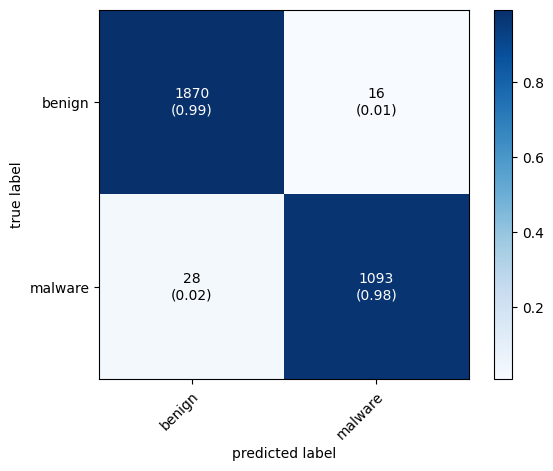

In [ ]:
xgb_cm = confusion_matrix(y_test, xgb_pred_test)
fig, ax = plot_confusion_matrix(conf_mat=xgb_cm, show_absolute=True, show_normed=True, colorbar=True, class_names=["benign", "malware"])
plt.show()

In [ ]:
# Define the neural network model
model = Sequential()

# Input layer
model.add(Dense(128, input_dim=215, activation='relu'))
model.add(Dropout(0.5))

# Hidden layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/500
475/475 [==============================] - 5s 6ms/step - loss: 0.1859 - accuracy: 0.9238 - val_loss: 0.0771 - val_accuracy: 0.9751
Epoch 2/500
475/475 [==============================] - 5s 10ms/step - loss: 0.0756 - accuracy: 0.9735 - val_loss: 0.0633 - val_accuracy: 0.9800
Epoch 3/500
475/475 [==============================] - 3s 6ms/step - loss: 0.0543 - accuracy: 0.9818 - val_loss: 0.0605 - val_accuracy: 0.9807
Epoch 4/500
475/475 [==============================] - 1s 3ms/step - loss: 0.0492 - accuracy: 0.9848 - val_loss: 0.0549 - val_accuracy: 0.9820
Epoch 5/500
475/475 [==============================] - 1s 3ms/step - loss: 0.0357 - accuracy: 0.9889 - val_loss: 0.0535 - val_accuracy: 0.9867
Epoch 6/500
475/475 [==============================] - 1s 3ms/step - loss: 0.0310 - accuracy: 0.9898 - val_loss: 0.0533 - val_accuracy: 0.9840
Epoch 7/500
475/475 [==============================] - 1s 3ms/step - loss: 0.0270 - accuracy: 0.9915 - val_loss: 0.0551 - val_accuracy: 0.985

In [ ]:
nn_pred_train = model.predict(X_train)
nn_pred_test = model.predict(X_test)

nn_train_score = accuracy_score(nn_pred_train > 0.5, y_train)
nn_test_score = accuracy_score(nn_pred_test > 0.5, y_test)
print("NeuralNetwork Train Score:", nn_train_score)
print("NeuralNetwork Test Score:", nn_test_score)

94/94 [==============================] - 0s 1ms/step
NeuralNetwork Train Score: 0.9994071146245059
NeuralNetwork Test Score: 0.9886930495510475


In [ ]:
nn_precision_score = precision_score(y_test, nn_pred_test > 0.5)
nn_f1_score = f1_score(y_test, nn_pred_test > 0.5)
nn_recall_score = recall_score(y_test, nn_pred_test > 0.5)
nn_accuracy_score = accuracy_score(y_test, nn_pred_test > 0.5)

print("NeuralNetwork Precision Score:", nn_precision_score)
print("NeuralNetwork F1 Score:", nn_f1_score)
print("NeuralNetwork Recall Score:", nn_recall_score)
print("NeuralNetwork Accuracy Score:", nn_accuracy_score)

NeuralNetwork Precision Score: 0.9865711727842436
NeuralNetwork F1 Score: 0.9848078641644327
NeuralNetwork Recall Score: 0.9830508474576272
NeuralNetwork Accuracy Score: 0.9886930495510475


In [ ]:
print(classification_report(y_test, nn_pred_test > 0.5))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1886
           1       0.99      0.98      0.98      1121

    accuracy                           0.99      3007
   macro avg       0.99      0.99      0.99      3007
weighted avg       0.99      0.99      0.99      3007



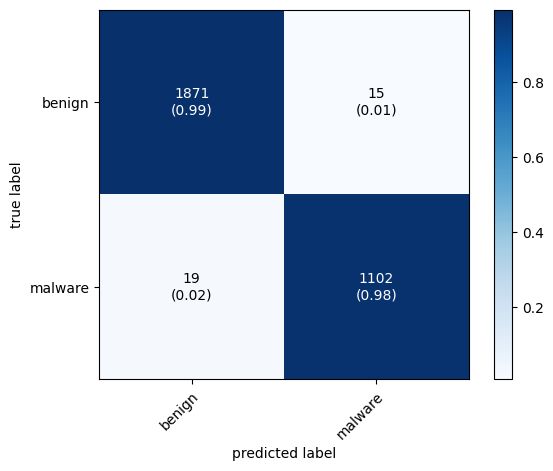

In [ ]:
nn_cm = confusion_matrix(y_test, nn_pred_test > 0.5)
fig, ax = plot_confusion_matrix(conf_mat=nn_cm, show_absolute=True, show_normed=True, colorbar=True, class_names=["benign", "malware"])
plt.show()

In [ ]:
labels = ["LR", "RF", "XGB", "NN"]
scores = [logreg_test_score,rf_test_score, xgb_test_score,nn_test_score]

In [ ]:
def plot_model_plot(labels, scores):
    plt.figure()
    ax = sns.barplot(x=labels, y=scores)
    ax.set_title("Trained Models Accuracy")
    for container in ax.containers:
        ax.bar_label(container)

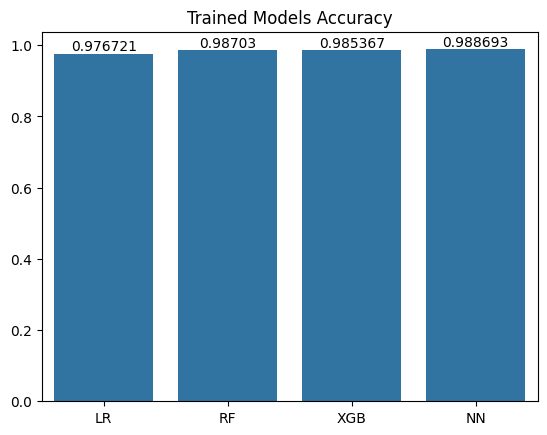

In [ ]:
plot_model_plot(labels, scores)
plt.show()

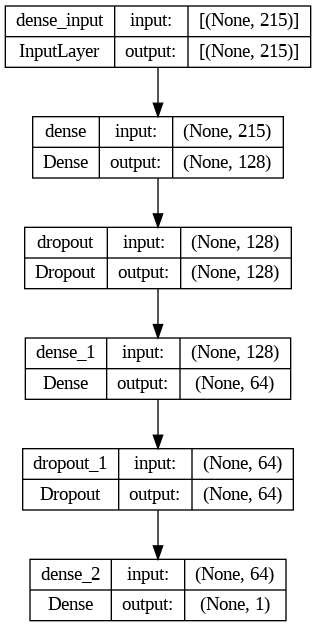

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Save the entire model to a HDF5 file
model.save('apk_analyzer_model.h5')

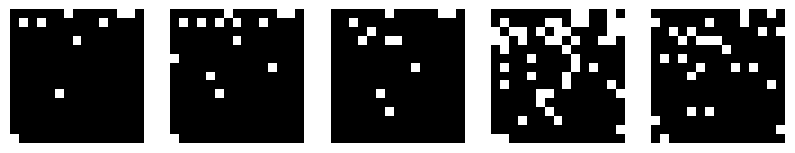

In [19]:
# Convert the DataFrame to a NumPy array
data_array = X.to_numpy()

# Calculate the padding needed
required_size = 15 * 15
padding_size = required_size - data_array.shape[1]

# Pad the data
padded_data = np.pad(data_array, ((0, 0), (0, padding_size)), 'constant', constant_values=0)

# Reshape each row into a 15x15 image
images = padded_data.reshape(-1, 15, 15)

# Function to plot the images
def plot_images(images, num_images=5):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')
    plt.show()

# Plot the first 5 images
plot_images(images, num_images=5)

In [20]:
X_train, X_val, y_train, y_val = train_test_split(images, y, test_size=0.2, random_state=42)

In [21]:
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', input_shape=(15, 15, 1), name='conv0'))
model.add(BatchNormalization(axis=-1, name='bn0'))
model.add(LeakyReLU(alpha=0.1))

# Max Pooling Layer
model.add(MaxPooling2D((2, 2), name='max_pool'))

# Second Convolutional Layer
model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', name='conv1'))
model.add(BatchNormalization(axis=-1, name='bn1'))
model.add(LeakyReLU(alpha=0.1))

# Average Pooling Layer
model.add(AveragePooling2D((2, 2), name='avg_pool'))

# Global Average Pooling Layer
model.add(GlobalAveragePooling2D())

# Fully Connected Layers
model.add(Dense(300, activation="relu", name='fc1'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid', name='output'))

In [22]:
# Compile the model with a different optimizer and learning rate
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv0 (Conv2D)              (None, 15, 15, 32)        320       
                                                                 
 bn0 (BatchNormalization)    (None, 15, 15, 32)        128       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 15, 15, 32)        0         
                                                                 
 max_pool (MaxPooling2D)     (None, 7, 7, 32)          0         
                                                                 
 conv1 (Conv2D)              (None, 7, 7, 64)          18496     
                                                                 
 bn1 (BatchNormalization)    (None, 7, 7, 64)          256       
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 7, 7, 64)          0

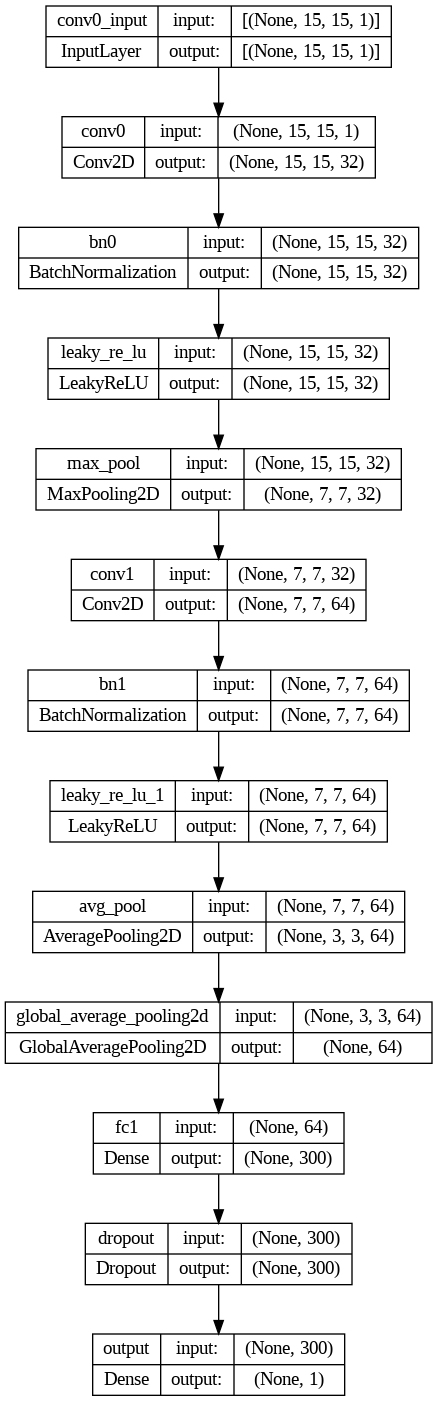

In [61]:
from keras.utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True)

In [24]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
376/376 [==============================] - 7s 14ms/step - loss: 0.4846 - accuracy: 0.7549
Epoch 2/50
376/376 [==============================] - 7s 19ms/step - loss: 0.3407 - accuracy: 0.8549
Epoch 3/50
376/376 [==============================] - 5s 14ms/step - loss: 0.2830 - accuracy: 0.8871
Epoch 4/50
376/376 [==============================] - 6s 17ms/step - loss: 0.2491 - accuracy: 0.9024
Epoch 5/50
376/376 [==============================] - 6s 16ms/step - loss: 0.2199 - accuracy: 0.9172
Epoch 6/50
376/376 [==============================] - 5s 14ms/step - loss: 0.1954 - accuracy: 0.9262
Epoch 7/50
376/376 [==============================] - 7s 19ms/step - loss: 0.1764 - accuracy: 0.9326
Epoch 8/50
376/376 [==============================] - 5s 14ms/step - loss: 0.1657 - accuracy: 0.9393
Epoch 9/50
376/376 [==============================] - 7s 18ms/step - loss: 0.1539 - accuracy: 0.9431
Epoch 10/50
376/376 [==============================] - 6s 15ms/step - loss: 0.1424 - accura

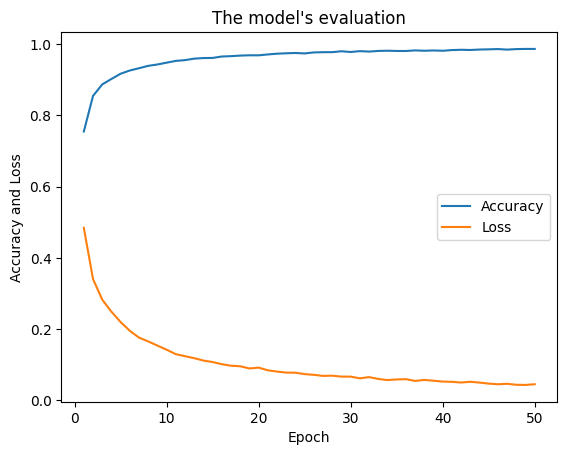

In [57]:
plt.plot(np.arange(1, 51),history.history["accuracy"])
plt.plot(np.arange(1, 51),history.history["loss"])
plt.title("The model's evaluation")
plt.xlabel('Epoch')
plt.legend(['Accuracy','Loss'])
plt.ylabel('Accuracy and Loss')
plt.show()

In [58]:
model.save('apk_analyzer_model_cnn.h5')